In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['font.family'] = 'Arial'

df = pd.read_csv('diabetes.csv')

# Tìm hiểu dữ liệu


In [4]:
print("Số dòng, số cột:", df.shape)

print("\nKiểu dữ liệu các cột:")
print(df.dtypes)

print("\n5 dòng đầu tiên:")
print(df.head())

print("\nThông tin tổng quan:")
print(df.info())

Số dòng, số cột: (768, 9)

Kiểu dữ liệu các cột:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

5 dòng đầu tiên:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   

# Tiền xử lý dữ liệu


In [5]:
# Các cột không nên có giá trị 0 (trừ Pregnancies và Outcome)
cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Đếm số lượng giá trị 0 ở các cột này
for col in cols_with_zero_invalid:
    n_zeros = (df[col] == 0).sum()
    print(f"Số lượng giá trị 0 bất hợp lý ở cột {col}: {n_zeros}")

# Thay thế giá trị 0 bằng NaN để xử lý tiếp
df[cols_with_zero_invalid] = df[cols_with_zero_invalid].replace(0, np.nan)

# Kiểm tra lại số lượng giá trị thiếu
print("\nSố lượng giá trị thiếu sau khi thay thế:")
print(df.isnull().sum())

# Xử lý giá trị thiếu: điền bằng median của từng cột
for col in cols_with_zero_invalid:
    median = df[col].median()
    df[col].fillna(median, inplace=True)
    print(f"Đã thay thế NaN ở cột {col} bằng median = {median}")

Số lượng giá trị 0 bất hợp lý ở cột Glucose: 5
Số lượng giá trị 0 bất hợp lý ở cột BloodPressure: 35
Số lượng giá trị 0 bất hợp lý ở cột SkinThickness: 227
Số lượng giá trị 0 bất hợp lý ở cột Insulin: 374
Số lượng giá trị 0 bất hợp lý ở cột BMI: 11

Số lượng giá trị thiếu sau khi thay thế:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
Đã thay thế NaN ở cột Glucose bằng median = 117.0
Đã thay thế NaN ở cột BloodPressure bằng median = 72.0
Đã thay thế NaN ở cột SkinThickness bằng median = 29.0
Đã thay thế NaN ở cột Insulin bằng median = 125.0
Đã thay thế NaN ở cột BMI bằng median = 32.3


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16848\3159824334.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median, inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16848\3159824334.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

# Khai phá dữ liệu


In [6]:
# Thống kê mô tả cho toàn bộ dữ liệu
desc = df.describe().T
desc['median'] = df.median()
print(desc)

# Giải thích ý nghĩa một số chỉ số
print("\nÝ nghĩa:")
print("- mean: Giá trị trung bình")
print("- std: Độ lệch chuẩn, thể hiện mức độ phân tán")
print("- min/max: Giá trị nhỏ/lớn nhất")
print("- 25%/50%/75%: Các phân vị, giúp hiểu về phân phối dữ liệu")

                          count        mean        std     min        25%  \
Pregnancies               768.0    3.845052   3.369578   0.000    1.00000   
Glucose                   768.0  121.656250  30.438286  44.000   99.75000   
BloodPressure             768.0   72.386719  12.096642  24.000   64.00000   
SkinThickness             768.0   29.108073   8.791221   7.000   25.00000   
Insulin                   768.0  140.671875  86.383060  14.000  121.50000   
BMI                       768.0   32.455208   6.875177  18.200   27.50000   
DiabetesPedigreeFunction  768.0    0.471876   0.331329   0.078    0.24375   
Age                       768.0   33.240885  11.760232  21.000   24.00000   
Outcome                   768.0    0.348958   0.476951   0.000    0.00000   

                               50%        75%     max    median  
Pregnancies                 3.0000    6.00000   17.00    3.0000  
Glucose                   117.0000  140.25000  199.00  117.0000  
BloodPressure              72.0

# Trực quan hóa dữ liệu


## Trực quan hóa phân phối dữ liệu

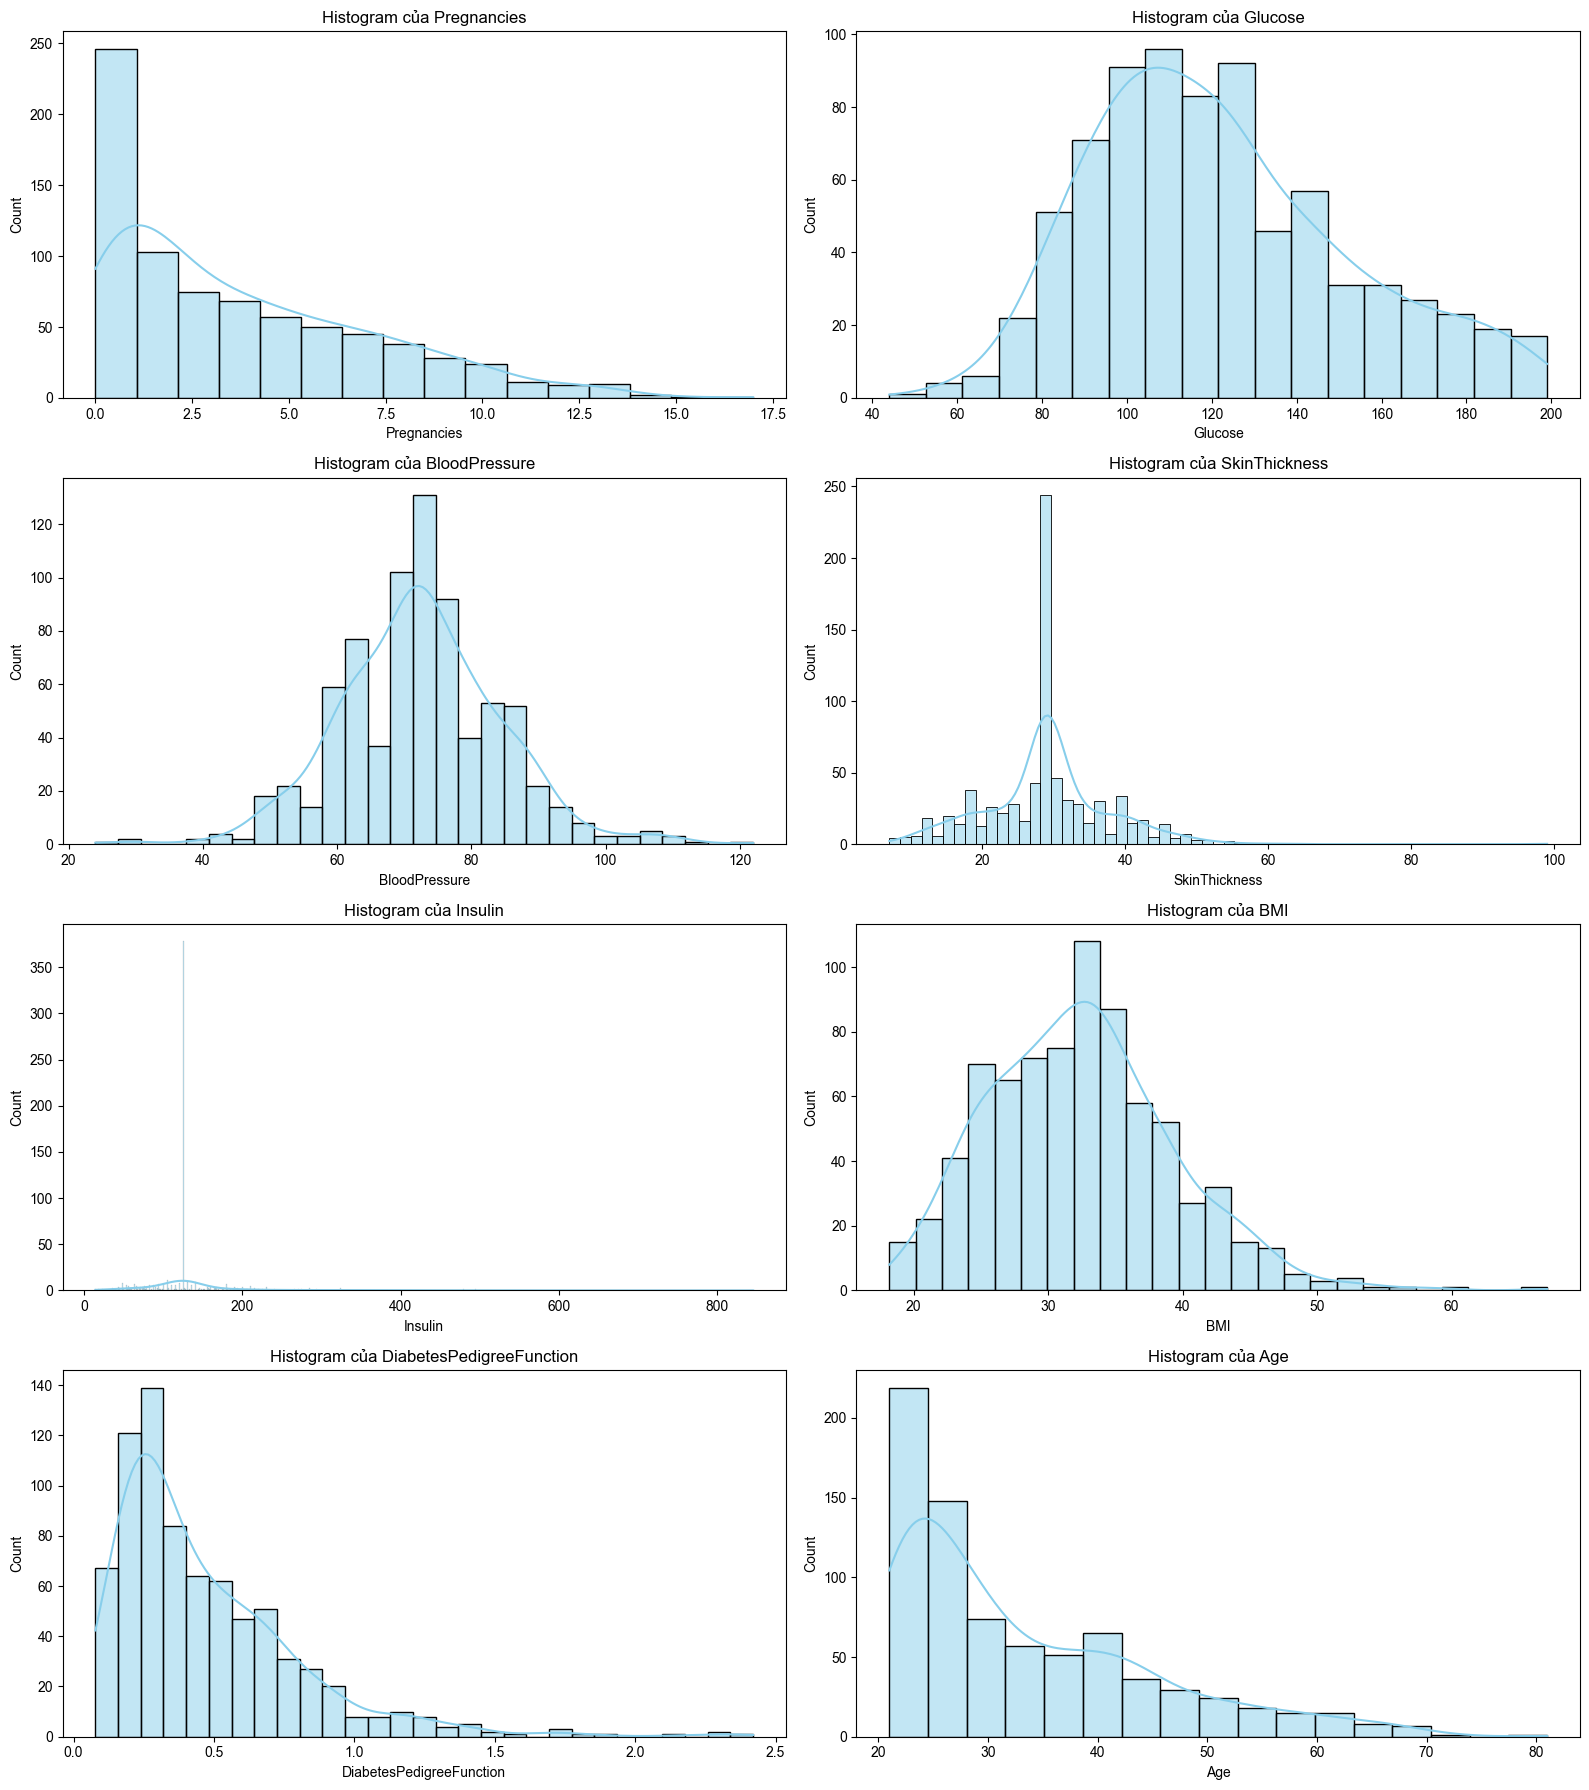

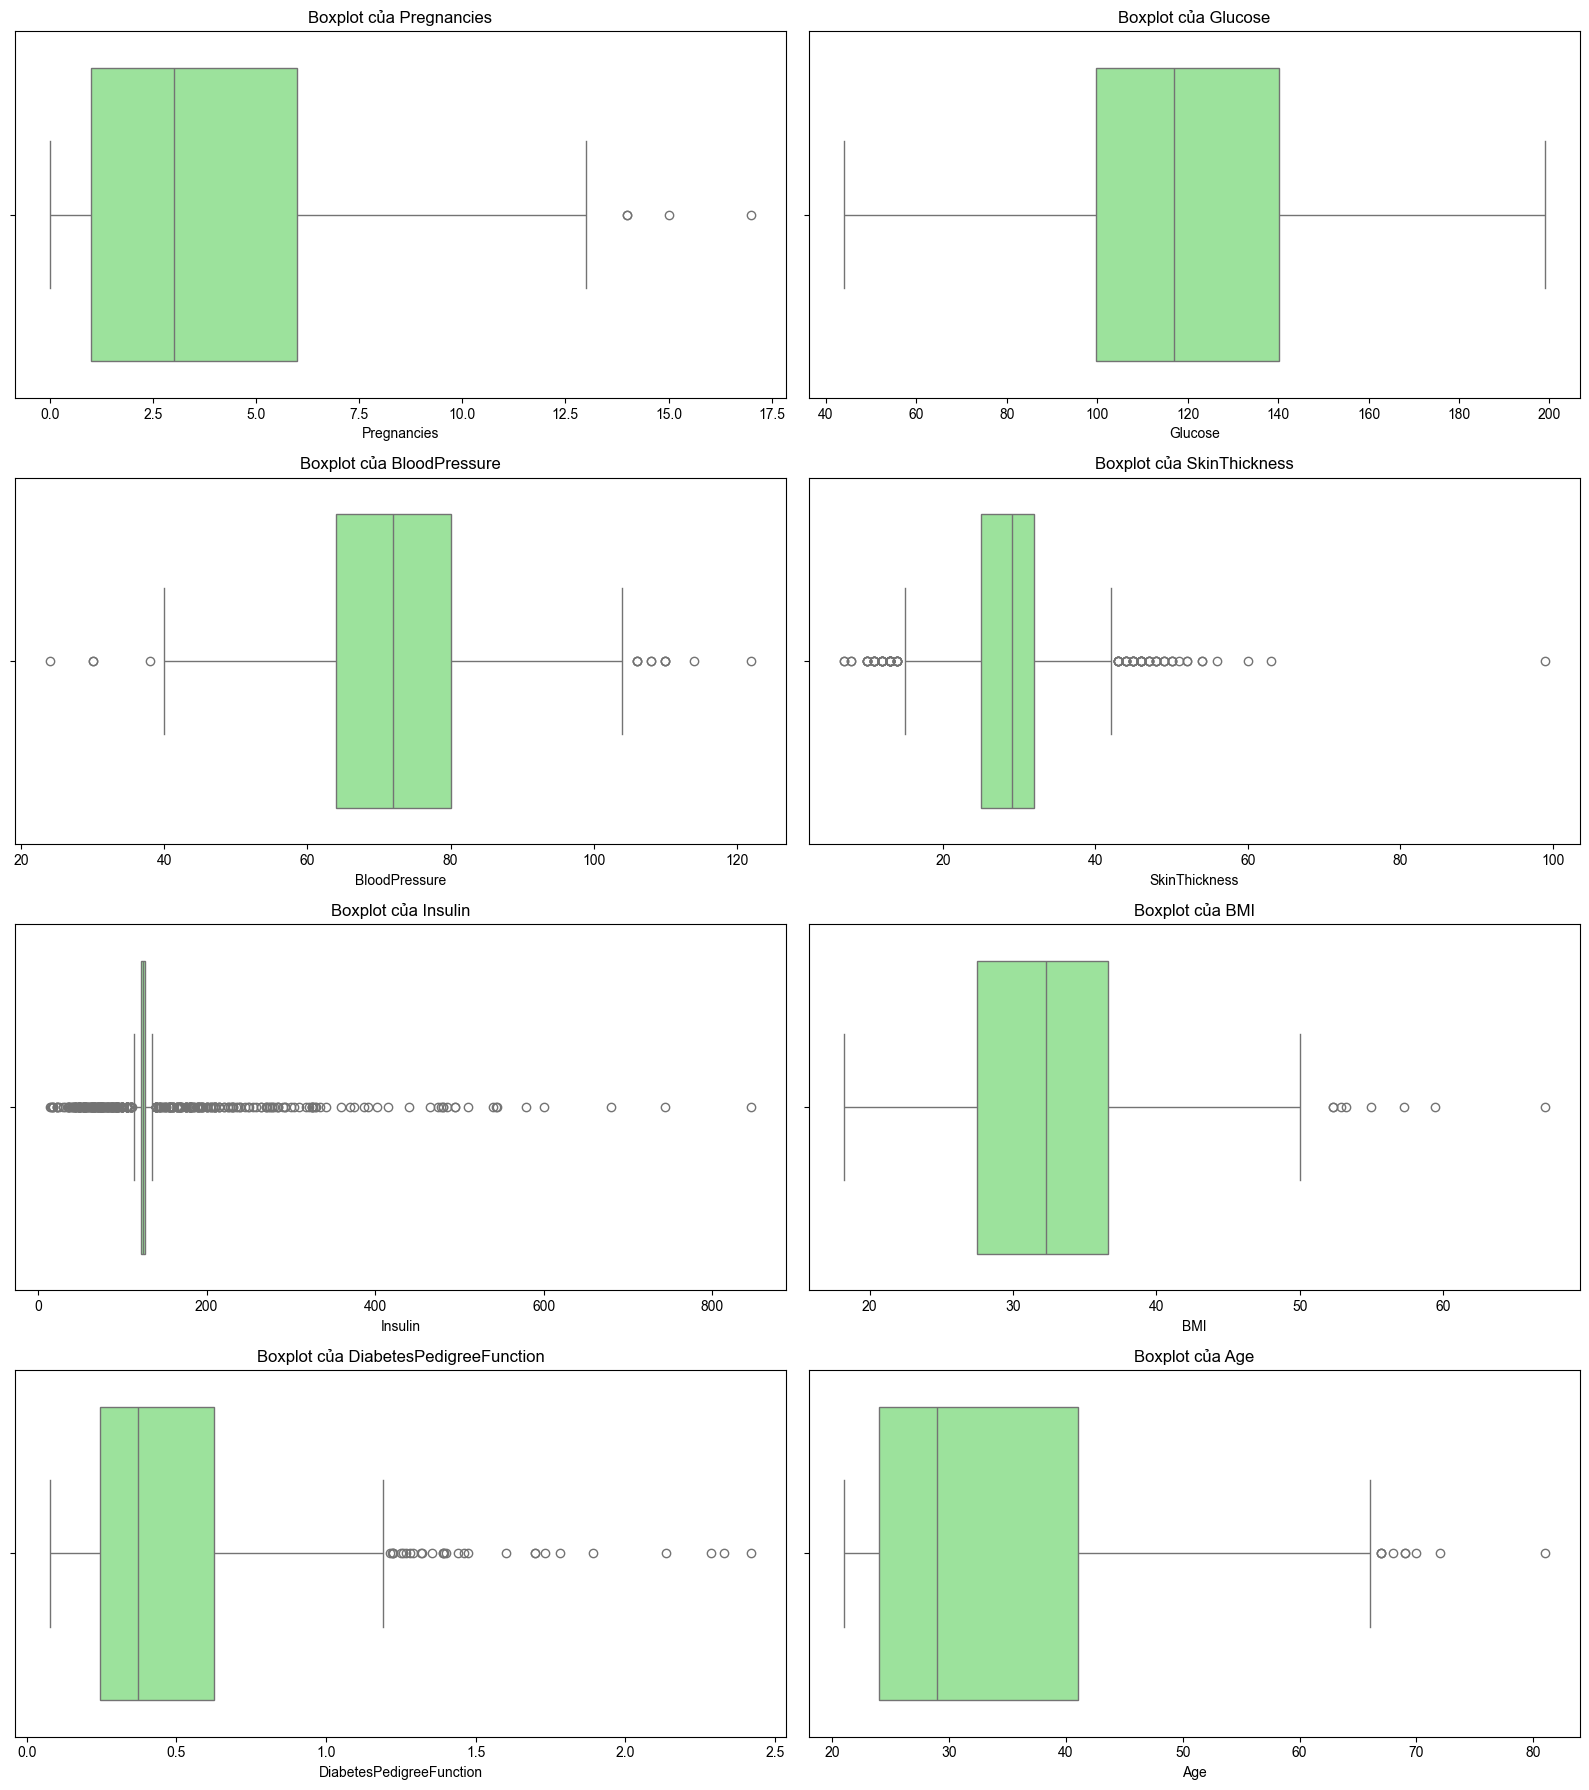

In [7]:
fig, axes = plt.subplots(4, 2, figsize=(16, 18))
axes = axes.flatten()
cols = df.columns[:-1]  # Bỏ Outcome

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Histogram của {col}')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(4, 2, figsize=(16, 18))
axes = axes.flatten()
for i, col in enumerate(cols):
    sns.boxplot(x=df[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot của {col}')
plt.tight_layout()
plt.show()

### Phân tích biểu đồ phân phối

- Histogram giúp nhận biết các thuộc tính có phân phối chuẩn hay lệch, có nhiều giá trị ngoại lệ không.
- Boxplot giúp phát hiện các giá trị ngoại lệ (outlier) và so sánh mức độ phân tán giữa các thuộc tính.
- Một số thuộc tính như Insulin, SkinThickness, BMI có nhiều giá trị lệch phải (skewed right) và xuất hiện outlier rõ rệt.

## Trực quan hóa mối quan hệ giữa các thuộc tính

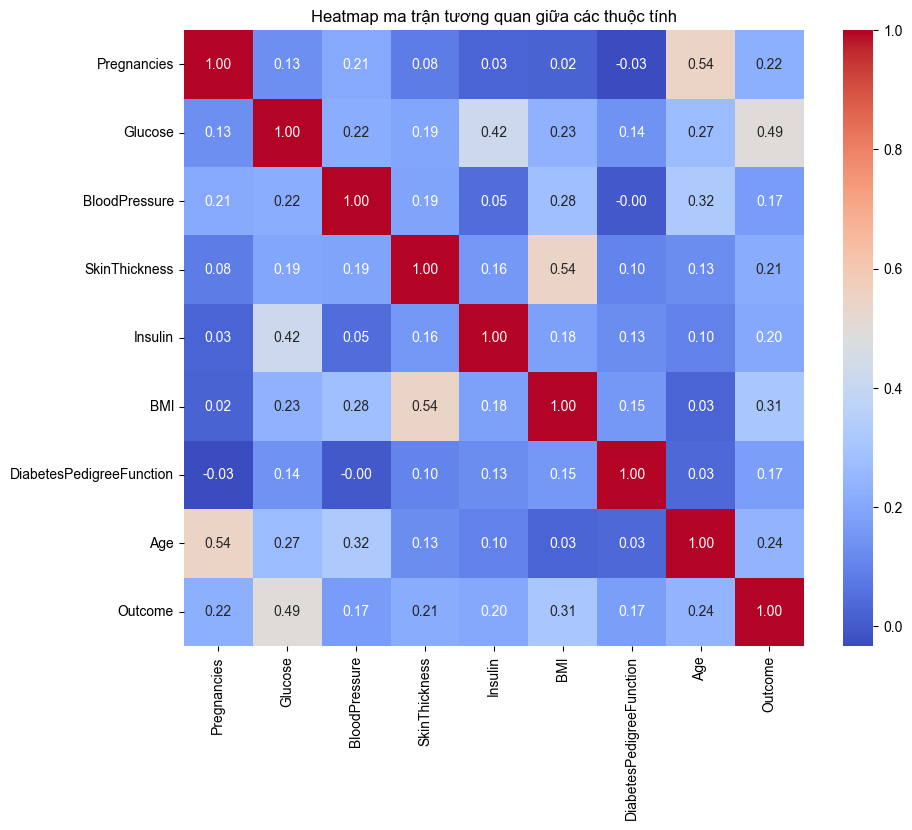

In [8]:
# Ma trận tương quan
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap ma trận tương quan giữa các thuộc tính')
plt.show()

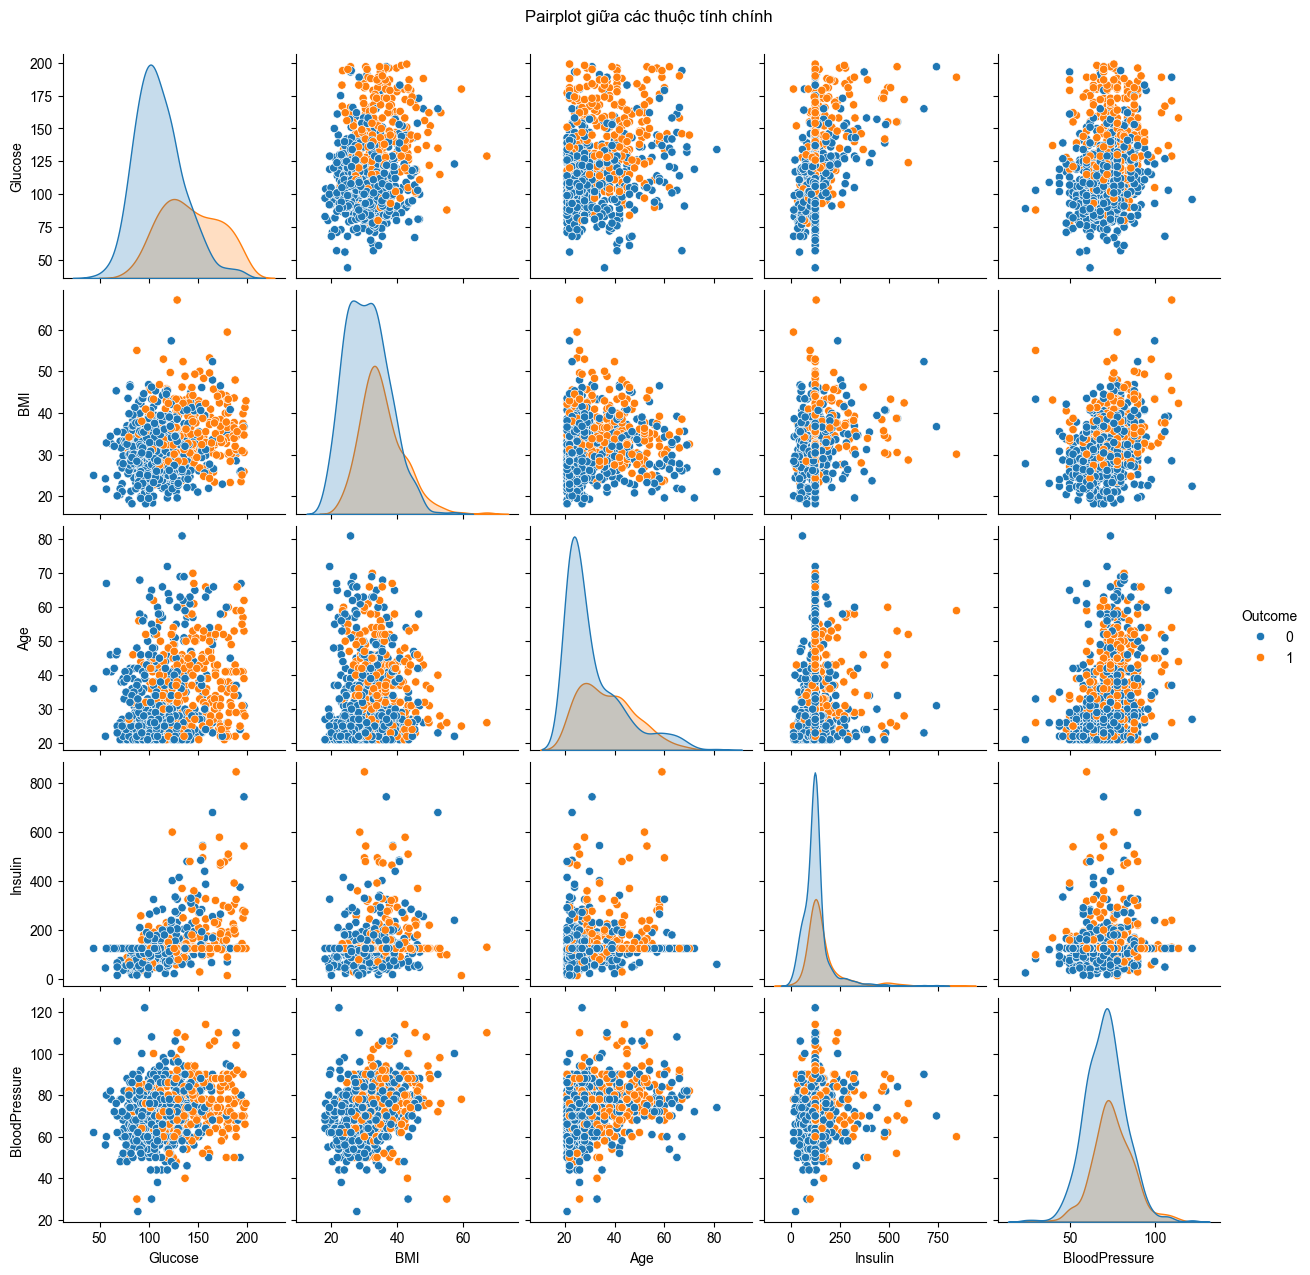

In [9]:

# Pairplot cho các thuộc tính chính
sns.pairplot(df, hue='Outcome', vars=['Glucose', 'BMI', 'Age', 'Insulin', 'BloodPressure'])
plt.suptitle('Pairplot giữa các thuộc tính chính', y=1.02)
plt.show()

### Phân tích mối quan hệ

- Glucose, BMI, Age có tương quan dương với Outcome, tức là giá trị càng cao thì nguy cơ tiểu đường càng lớn.
- Một số thuộc tính như Insulin, SkinThickness có mối liên hệ yếu hơn với Outcome.
- Các thuộc tính có tương quan với nhau ở mức vừa phải, không quá cao (tránh multicollinearity).

# Phân tích sự khác biệt giữa nhóm Outcome

 So sánh phân phối các thuộc tính giữa nhóm không mắc (Outcome=0) và mắc tiểu đường (Outcome=1) bằng boxplot, violinplot để phân tích sự khác biệt.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16848\4085864248.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, ax=axes[i], palette='Set2')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16848\4085864248.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, ax=axes[i], palette='Set2')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16848\4085864248.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, ax=axes[i], palette='Set2')
C:\Users\ASUS\AppData\Local\Temp\ipykern

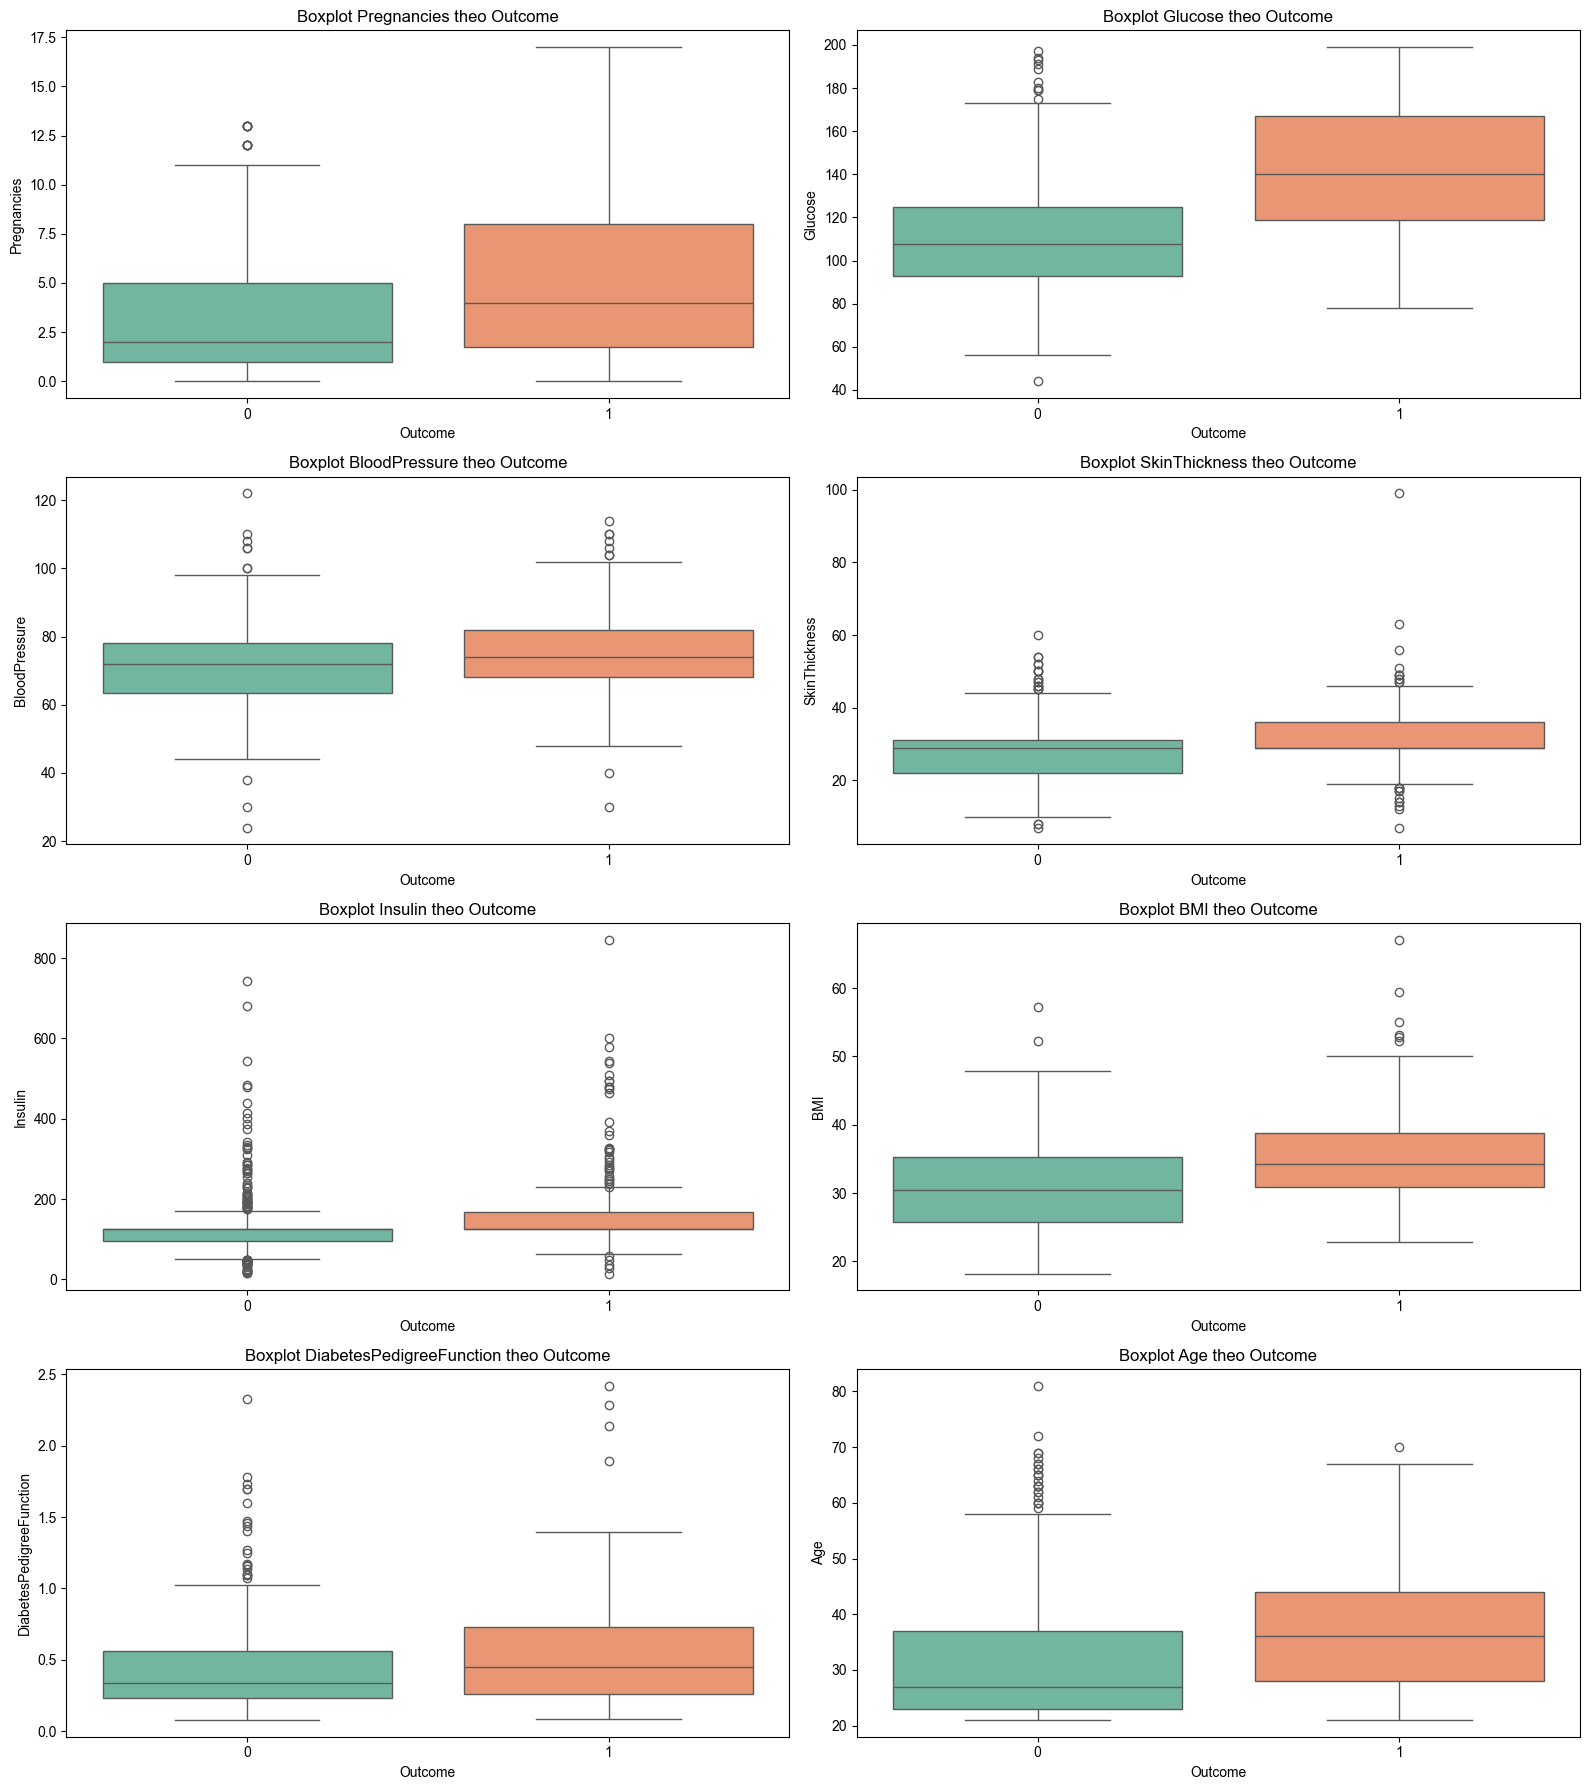

In [10]:
#Boxplot: So sánh trung vị, phạm vi giá trị, phát hiện outlier giữa hai nhóm.
cols = df.columns[:-1]
fig, axes = plt.subplots(4, 2, figsize=(16, 18))
axes = axes.flatten()
for i, col in enumerate(cols):
    sns.boxplot(x='Outcome', y=col, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Boxplot {col} theo Outcome')
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16848\2337526521.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, ax=axes[i], palette='Set3', split=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16848\2337526521.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, ax=axes[i], palette='Set3', split=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16848\2337526521.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, ax=axes[i], palette='Set3', split=T

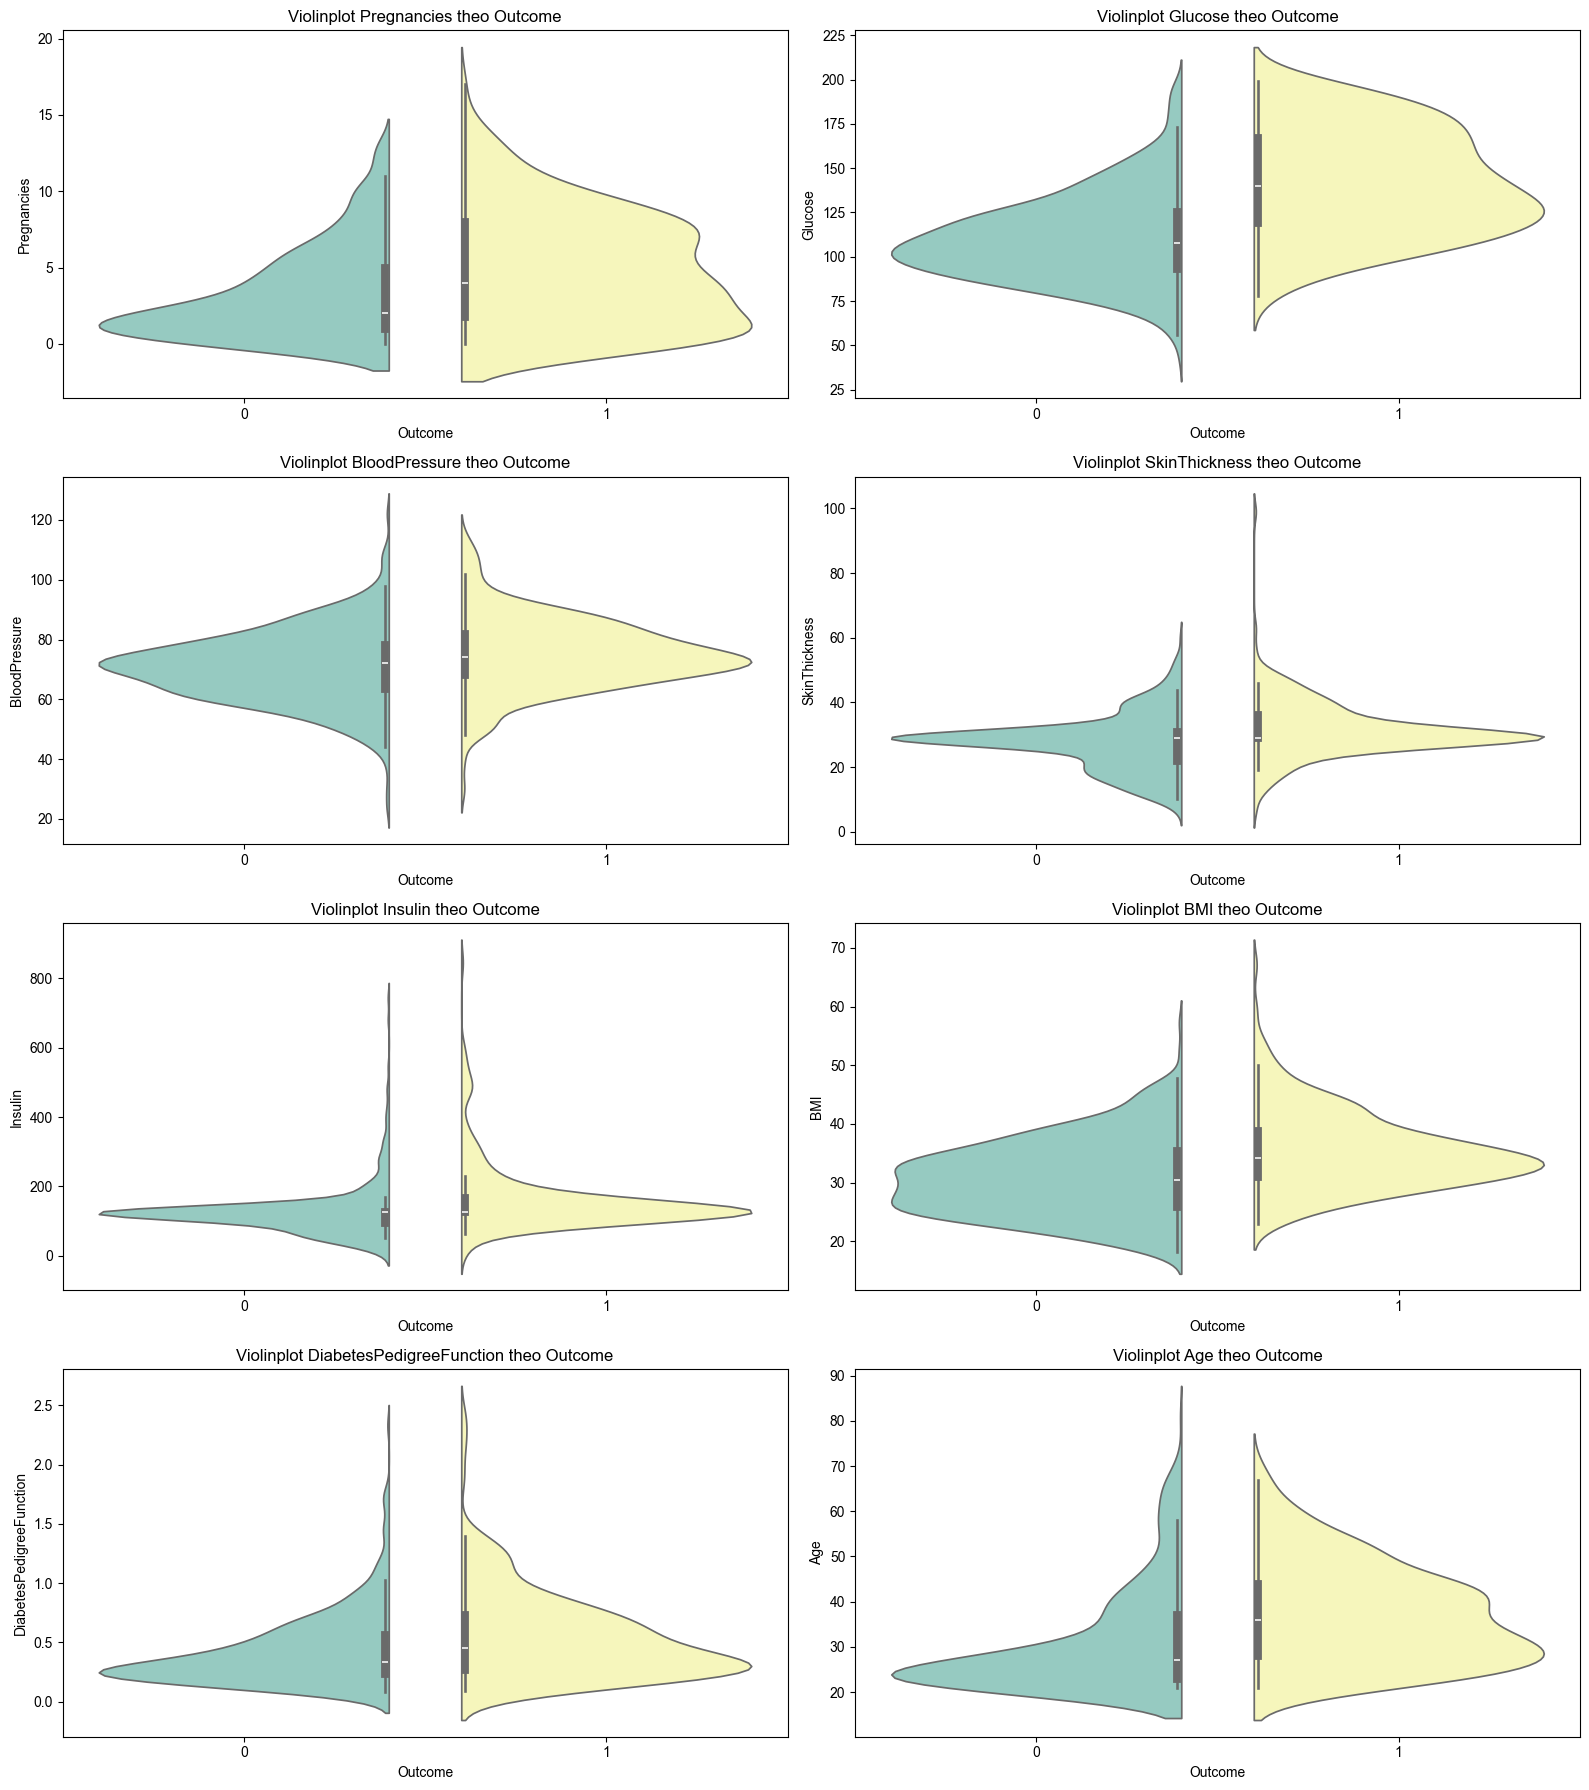

In [11]:
#Violinplot: Thể hiện phân phối xác suất, mật độ giá trị của từng thuộc tính theo từng nhóm Outcome.
fig, axes = plt.subplots(4, 2, figsize=(16, 18))
axes = axes.flatten()
for i, col in enumerate(cols):
    sns.violinplot(x='Outcome', y=col, data=df, ax=axes[i], palette='Set3', split=True)
    axes[i].set_title(f'Violinplot {col} theo Outcome')
plt.tight_layout()
plt.show()

### Phân tích

Glucose
- Nhóm Outcome=1 có giá trị Glucose trung bình và trung vị cao hơn hẳn nhóm Outcome=0.
- Phân phối Glucose ở nhóm mắc tiểu đường lệch phải, nhiều giá trị cao.
- Điều này phù hợp với y học: Glucose cao là yếu tố nguy cơ lớn nhất.

BMI
- BMI của nhóm Outcome=1 cũng cao hơn rõ rệt, cho thấy béo phì liên quan đến nguy cơ tiểu đường.
- Boxplot và violinplot đều cho thấy sự khác biệt này.

Age
- Người mắc tiểu đường (Outcome=1) thường lớn tuổi hơn.
- Phân phối tuổi ở nhóm này rộng hơn, nhiều người trên 40 tuổi.
Insulin, SkinThickness
- Nhóm Outcome=1 có xu hướng Insulin và SkinThickness cao hơn, nhưng sự khác biệt không rõ rệt bằng
- Glucose, BMI, Age.
- Nhiều outlier ở cả hai nhóm.
BloodPressure
- Sự khác biệt giữa hai nhóm không quá lớn, nhưng nhóm Outcome=1 có trung vị nhỉnh hơn.
Pregnancies
- Số lần mang thai trung bình ở nhóm Outcome=1 cao hơn, phù hợp với nguy cơ tiểu đường thai kỳ.

Kết luận

- Glucose, BMI, Age là ba thuộc tính phân biệt rõ nhất giữa hai nhóm.
- Insulin, SkinThickness, BloodPressure cũng có vai trò nhưng mức độ phân biệt thấp hơn.
- Các biểu đồ cho thấy khả năng phân loại nhóm nguy cơ dựa vào các thuộc tính này là khả thi.

Phán đoán

- Người có Glucose, BMI, tuổi cao nên được tầm soát tiểu đường thường xuyên.
- Các thuộc tính này có thể dùng để xây dựng mô hình dự báo nguy cơ tiểu đường.
- Việc kiểm soát cân nặng, chế độ ăn uống, vận động sẽ giúp giảm nguy cơ mắc bệnh.


# Phát hiện ngoại lệ và xử lý

Mục đích: Phát hiện ngoại lệ bằng boxplot, z-score hoặc IQR, xử lý hoặc đánh dấu các giá trị bất thường để tránh ảnh hưởng đến phân tích.

In [12]:
from scipy.stats import zscore

# Tính z-score cho các thuộc tính số
z_scores = np.abs(zscore(df[cols]))
outlier_mask = (z_scores > 3)
outlier_counts = outlier_mask.sum(axis=0)
for i, col in enumerate(cols):
    print(f"Số lượng ngoại lệ (z-score > 3) ở cột {col}: {outlier_counts[i]}")

# Đánh dấu các dòng có ít nhất 1 ngoại lệ
df['is_outlier'] = (outlier_mask.sum(axis=1) > 0)
print(f"\nTổng số dòng có ít nhất 1 ngoại lệ: {df['is_outlier'].sum()}")

# (Có thể loại bỏ hoặc giữ lại tùy mục đích, ở đây chỉ đánh dấu)

Số lượng ngoại lệ (z-score > 3) ở cột Pregnancies: 4
Số lượng ngoại lệ (z-score > 3) ở cột Glucose: 0
Số lượng ngoại lệ (z-score > 3) ở cột BloodPressure: 8
Số lượng ngoại lệ (z-score > 3) ở cột SkinThickness: 4
Số lượng ngoại lệ (z-score > 3) ở cột Insulin: 20
Số lượng ngoại lệ (z-score > 3) ở cột BMI: 5
Số lượng ngoại lệ (z-score > 3) ở cột DiabetesPedigreeFunction: 11
Số lượng ngoại lệ (z-score > 3) ở cột Age: 5

Tổng số dòng có ít nhất 1 ngoại lệ: 50


## Nhận xét và phán đoán

Tổng hợp các phát hiện, đưa ra nhận xét về các yếu tố nguy cơ, xu hướng, mối liên hệ với bệnh tiểu đường dựa trên dữ liệu đã phân tích.

### Nhận xét tổng quan

- **Glucose, BMI, Age** là các yếu tố nguy cơ nổi bật: người có giá trị cao ở các thuộc tính này dễ mắc tiểu đường hơn.
- **Insulin** và **SkinThickness** cũng có vai trò nhưng mức độ ảnh hưởng thấp hơn.
- Dữ liệu có một số ngoại lệ, đặc biệt ở các thuộc tính Insulin, SkinThickness, Age, cần chú ý khi xây dựng mô hình dự đoán.
- Sự khác biệt rõ rệt giữa hai nhóm Outcome cho thấy khả năng phân loại dựa trên các thuộc tính này là khả thi.
- Cần xử lý giá trị thiếu và ngoại lệ cẩn thận để đảm bảo chất lượng phân tích và mô hình hóa.

### Phán đoán

- Những người có chỉ số Glucose, BMI, tuổi cao nên được tầm soát tiểu đường thường xuyên.
- Việc kiểm soát cân nặng, chế độ ăn uống và vận động có thể giúp giảm nguy cơ mắc bệnh.
- Dữ liệu này phù hợp để xây dựng các mô hình dự đoán nguy cơ tiểu đường dựa trên các thuộc tính đã phân tích.